import file 

In [132]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 


movie EDA

In [133]:
movie=pd.read_csv('imdb_movies.csv') 


In [134]:
movie.head()

,link,description,rating,votes,year,duration,certificate,meta_score,title,type,popularity,genre,director,writer,stars,country,language,production_company,worldwide_gross
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,"Over the course of several years, two convicts...",9.3,"2,850,860",1994,2h 22m,R,82.0,The Shawshank Redemption,Movie,82,Drama,Frank Darabont,"Stephen King,Frank Darabont","Tim Robbins,Morgan Freeman,Bob Gunton",United States,English,Castle Rock Entertainment,"$28,884,716"
1,https://www.imdb.com/title/tt23849204/?ref_=sr...,The real-life story of IPS Officer Manoj Kumar...,9.2,"89,982",2023,2h 27m,NaN,NaN,12th Fail,Movie,25,"Biography,Drama",Vidhu Vinod Chopra,"Vidhu Vinod Chopra,Jaskunwar Kohli,Anurag Pathak","Vikrant Massey,Medha Shankar,Joshi Anantvijay",India,"Hindi,Malayalam,Tamil,Telugu,Kannada","Vinod Chopra Films,Zee Studios","$138,288"
2,https://www.imdb.com/title/tt0068646/?ref_=sr_t_3,"Don Vito Corleone, head of a mafia family, dec...",9.2,"1,986,391",1972,2h 55m,R,100.0,The Godfather,Movie,81,"Crime,Drama",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","Marlon Brando,Al Pacino,James Caan",United States,"English,Italian,Latin","Paramount Pictures,Albert S. Ruddy Productions...","$250,341,816"
3,https://www.imdb.com/title/tt0468569/?ref_=sr_t_4,When the menace known as the Joker wreaks havo...,9.0,"2,832,194",2008,2h 32m,PG-13,84.0,The Dark Knight,Movie,94,"Action,Crime,Drama",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","Christian Bale,Heath Ledger,Aaron Eckhart","United States,United Kingdom","English,Mandarin","Warner Bros.,Legendary Entertainment,Syncopy","$1,029,266,147"
4,https://www.imdb.com/title/tt0108052/?ref_=sr_t_5,"In German-occupied Poland during World War II,...",9.0,"1,432,170",1993,3h 15m,R,95.0,Schindler's List,Movie,106,"Biography,Drama,History",Steven Spielberg,"Thomas Keneally,Steven Zaillian","Liam Neeson,Ralph Fiennes,Ben Kingsley",United States,"English,Hebrew,German,Polish,Latin","Universal Pictures,Amblin Entertainment","$322,161,245"


In [135]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   link                3511 non-null   object 
 1   description         3511 non-null   object 
 2   rating              3511 non-null   float64
 3   votes               3511 non-null   object 
 4   year                3511 non-null   int64  
 5   duration            3511 non-null   object 
 6   certificate         3489 non-null   object 
 7   meta_score          3351 non-null   float64
 8   title               3509 non-null   object 
 9   type                3511 non-null   object 
 10  popularity          726 non-null    object 
 11  genre               3509 non-null   object 
 12  director            3509 non-null   object 
 13  writer              3509 non-null   object 
 14  stars               3503 non-null   object 
 15  country             3509 non-null   object 
 16  langua

In [136]:
movie.describe()

,rating,year,meta_score
count,3511.000000,3511.000000,3351.000000
mean,7.099089,2003.064654,64.071322
std,0.653912,16.488089,16.061114
min,6.000000,1920.000000,16.000000
25%,6.600000,1997.000000,52.000000
50%,7.100000,2007.000000,64.000000
75%,7.600000,2014.000000,76.000000
max,9.300000,2023.000000,100.000000


In [137]:
movie.shape[0]

3511

In [138]:
(movie.isnull().sum()/movie.shape[0] )*100#checking for null values


link                   0.000000
description            0.000000
rating                 0.000000
votes                  0.000000
year                   0.000000
duration               0.000000
certificate            0.626602
meta_score             4.557106
title                  0.056964
type                   0.000000
popularity            79.322130
genre                  0.056964
director               0.056964
writer                 0.056964
stars                  0.227855
country                0.056964
language               0.085446
production_company     0.113928
worldwide_gross        4.215323
dtype: float64

In [139]:
movie.drop(['link','popularity','meta_score'],axis=1,inplace=True)  #dropping the columns which are not required

In [140]:
movie["votes"]=movie["votes"].str.replace(",","").astype(int) #removing the commas and converting the datatype to float

In [141]:
def convert_to_minutes(record):
    parts = record.split()
    total_minutes = 0

    for part in parts:
        if 'h' in part:
            hours = int(part[:-1])
            total_minutes += hours * 60
        elif 'm' in part:
            minutes = int(part[:-1])
            total_minutes += minutes

    return total_minutes

# Apply the function to the 'duration' column
movie['duration'] = movie['duration'].apply(convert_to_minutes)



In [142]:
len(movie["country"].dropna())

3509

In [143]:
countrylist=[]
country=movie["country"].dropna()
for i in range(len(country)):
    x=country.str.split(",").iloc[i]
    if len(x)>1:
        for j in x:
            countrylist.append(j)
    else:
        countrylist.append(x[0])       



In [144]:
directorlsit=[]
director=movie["director"].dropna()
for i in range(len(director)):
    x=director.str.split(",").iloc[i]
    if len(x)>1:
        for j in x:
            directorlsit.append(j)
    else:
        directorlsit.append(x[0])

In [145]:
starslist=[]
stars=movie["stars"].dropna()
for i in range(len(stars)):
    x=stars.str.split(",").iloc[i]
    if len(x)>1:
        for j in x:
            starslist.append(j)
    else:
        starslist.append(x[0])


In [146]:
writerlist=[]
writer=movie["writer"].dropna()
for i in range(len(writer)):
    x=writer.str.split(",").iloc[i]
    if len(x)>1:
        for j in x:
            writerlist.append(j)
    else:
        writerlist.append(x[0])

In [147]:
production_companylist=[]
production_company=movie["production_company"].dropna()
for i in range(len(production_company)):
    x=production_company.str.split(",").iloc[i]
    if len(x)>1:
        for j in x:
            production_companylist.append(j)
    else:
        production_companylist.append(x[0])

In [148]:
language_list=[]
language=movie["language"].dropna()
for i in range(len(language)):
    x=language.str.split(",").iloc[i]
    if len(x)>1:
        for j in x:
            language_list.append(j)
    else:
        language_list.append(x[0])

In [149]:
genrelsit=[]
genre=movie["genre"].dropna()
for i in range(len(genre)):
    x=genre.str.split(",").iloc[i]
    if len(x)>1:
        for j in x:
            genrelsit.append(j)
    else:
        genrelsit.append(x[0])

In [150]:
movie["year"]=pd.to_datetime(movie["year"],format='%Y') #converting the year to datetime format

In [151]:
movie["worldwide_gross"]=movie["worldwide_gross"].str.replace(",","").str.replace("$","").astype(float) #removing the commas and converting the datatype to float

In [152]:
len(movie["certificate"].unique())

20

In [153]:
movie['parentalguide'] = movie['certificate'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'Approved': 'Kids - with parental guidence',
                'Passed': 'Kids - with parental guidence',
                'Not Rated': 'Not Rated'
                ,'Unrated': 'Not Rated'
                ,'X': 'Adults'
                ,'M': 'Adults'
                ,'GP': 'Kids - with parental guidence'
                ,'18+': 'Adults'
                ,'13+': 'Teens - Age above 12'
                ,'M/PG': 'Kids - with parental guidence'
                
})


In [154]:
(movie.isnull().sum()/movie.shape[0] )*100#checking for null values


description           0.000000
rating                0.000000
votes                 0.000000
year                  0.000000
duration              0.000000
certificate           0.626602
title                 0.056964
type                  0.000000
genre                 0.056964
director              0.056964
writer                0.056964
stars                 0.227855
country               0.056964
language              0.085446
production_company    0.113928
worldwide_gross       4.215323
parentalguide         0.626602
dtype: float64

In [155]:
movie.head()

,description,rating,votes,year,duration,certificate,title,type,genre,director,writer,stars,country,language,production_company,worldwide_gross,parentalguide
0,"Over the course of several years, two convicts...",9.3,2850860,1994-01-01,142,R,The Shawshank Redemption,Movie,Drama,Frank Darabont,"Stephen King,Frank Darabont","Tim Robbins,Morgan Freeman,Bob Gunton",United States,English,Castle Rock Entertainment,2.888472e+07,Adults
1,The real-life story of IPS Officer Manoj Kumar...,9.2,89982,2023-01-01,147,NaN,12th Fail,Movie,"Biography,Drama",Vidhu Vinod Chopra,"Vidhu Vinod Chopra,Jaskunwar Kohli,Anurag Pathak","Vikrant Massey,Medha Shankar,Joshi Anantvijay",India,"Hindi,Malayalam,Tamil,Telugu,Kannada","Vinod Chopra Films,Zee Studios",1.382880e+05,NaN
2,"Don Vito Corleone, head of a mafia family, dec...",9.2,1986391,1972-01-01,175,R,The Godfather,Movie,"Crime,Drama",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","Marlon Brando,Al Pacino,James Caan",United States,"English,Italian,Latin","Paramount Pictures,Albert S. Ruddy Productions...",2.503418e+08,Adults
3,When the menace known as the Joker wreaks havo...,9.0,2832194,2008-01-01,152,PG-13,The Dark Knight,Movie,"Action,Crime,Drama",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","Christian Bale,Heath Ledger,Aaron Eckhart","United States,United Kingdom","English,Mandarin","Warner Bros.,Legendary Entertainment,Syncopy",1.029266e+09,Teens - Age above 12
4,"In German-occupied Poland during World War II,...",9.0,1432170,1993-01-01,195,R,Schindler's List,Movie,"Biography,Drama,History",Steven Spielberg,"Thomas Keneally,Steven Zaillian","Liam Neeson,Ralph Fiennes,Ben Kingsley",United States,"English,Hebrew,German,Polish,Latin","Universal Pictures,Amblin Entertainment",3.221612e+08,Adults


In [156]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   description         3511 non-null   object        
 1   rating              3511 non-null   float64       
 2   votes               3511 non-null   int32         
 3   year                3511 non-null   datetime64[ns]
 4   duration            3511 non-null   int64         
 5   certificate         3489 non-null   object        
 6   title               3509 non-null   object        
 7   type                3511 non-null   object        
 8   genre               3509 non-null   object        
 9   director            3509 non-null   object        
 10  writer              3509 non-null   object        
 11  stars               3503 non-null   object        
 12  country             3509 non-null   object        
 13  language            3508 non-null   object      

In [157]:
movie.describe()

,rating,votes,year,duration,worldwide_gross
count,3511.000000,3.511000e+03,3511,3511.000000,3.363000e+03
mean,7.099089,2.158614e+05,2003-01-24 17:54:58.547422464,115.076047,1.477534e+08
min,6.000000,5.001000e+04,1920-01-01 00:00:00,26.000000,6.700000e+01
25%,6.600000,7.680200e+04,1997-01-01 00:00:00,99.000000,2.022059e+07
50%,7.100000,1.280640e+05,2007-01-01 00:00:00,112.000000,6.360542e+07
75%,7.600000,2.468165e+05,2014-01-01 00:00:00,127.000000,1.726919e+08
max,9.300000,2.850860e+06,2023-01-01 00:00:00,321.000000,2.923706e+09
std,0.653912,2.500663e+05,NaN,22.288926,2.356191e+08


<Axes: >

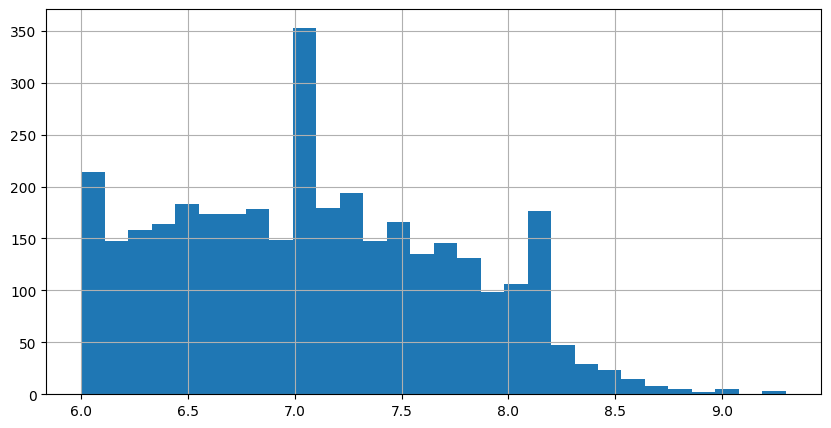

In [158]:
movie['rating'].hist(bins=30,figsize=(10,5))  